## 2024년 5월 27일

Task1_0527. 4개의 Series를 결합하여 데이터프레임을 생성하여 출력하세요.
- 출력한 데이터프레임에서 추출하고 싶은 5개의 데이터를 인덱싱하여 출력
- null값을 3개 추가
- null값의 개수를 확인하고 삭제
- 2개의 데이터를 수정
- 1개의 행을 삭제

In [ ]:
import numpy as np
import pandas as pd

# 데이터프레임 생성
id = np.arange(1, 1001)
i1 = pd.Series(id)
gender = np.random.randint(2, size=1000)
g1 = pd.Series(gender)
age = np.random.randint(1, 101, size=1000)
a1 = pd.Series(age)
region = np.random.randint(1, 11, size=1000)
r1 = pd.Series(region)
df = pd.concat([i1, g1, a1, r1], axis=1)
df.rename(columns={0: 'id', 1: 'gender', 2: 'age', 3: 'region'}, inplace=True)


In [ ]:
# 데이터프레임에서 추출하고 싶은 5개의 데이터를 인덱싱하여 출력
print(df.iloc[[0, 1, 2, 3, 4]])

   id  gender  age  region
0   1       0   22       5
1   2       0   58       1
2   3       0   55       2
3   4       0   58       7
4   5       0   14       5


In [ ]:
# null값을 3개 추가
df.loc[0, 'age'] = np.nan
df.loc[1, 'gender'] = np.nan
df.loc[2, 'region'] = np.nan

In [ ]:
# null값의 개수를 확인하고 삭제
null_counts = df.isnull().sum()
print( null_counts,'\n')
df.dropna(inplace=True)
print(df.head(7))

id        0
gender    1
age       1
region    1
dtype: int64 

   id  gender   age  region
3   4     0.0  58.0     7.0
4   5     0.0  14.0     5.0
5   6     0.0   2.0     1.0
6   7     1.0  96.0     4.0
7   8     1.0  34.0     1.0
8   9     1.0  92.0     4.0
9  10     0.0  16.0     4.0


In [ ]:
# 2개의 데이터를 수정
df.loc[3, 'age'] = 50
df.loc[4, 'region'] = 5

In [ ]:
# 1개의 행을 삭제
df.drop(index=5, inplace=True)

In [ ]:
# 최종 데이터프레임 출력
print(df.head(7))

    id  gender   age  region
3    4     0.0  50.0     7.0
4    5     0.0  14.0     5.0
6    7     1.0  96.0     4.0
7    8     1.0  34.0     1.0
8    9     1.0  92.0     4.0
9   10     0.0  16.0     4.0
10  11     1.0  13.0     6.0


Task2_0527. 학생별 성적 데이터셋으로 의미있게 데이터 셋을 수정하세요.(아래 사항 반영)
- S1 ~ S10은 평균 점수를 기준으로 1등급에서 10등급이고 등급간 점수 차는 5점
- 결시자가 국어 3명, 수학 2명 있음
- 영어, 수학의 평균 점수가 국어 대비 5점 낮음

In [ ]:
import pandas as pd
import numpy as np
df = np.random.randint(1,5,size=(10,5))
df=pd.DataFrame(df,index=['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'],
               columns=['국어','영어','수학','과학','사회'])



In [ ]:
# 평균점수를 기준으로 1등급 10등급 등급간 점수차는 5점
for i in range(10):
  df.iloc[i] = 90 - i * 5
df

,국어,영어,수학,과학,사회
s1,90,90,90,90,90
s2,85,85,85,85,85
s3,80,80,80,80,80
s4,75,75,75,75,75
s5,70,70,70,70,70
s6,65,65,65,65,65
s7,60,60,60,60,60
s8,55,55,55,55,55
s9,50,50,50,50,50
s10,45,45,45,45,45


In [ ]:
# 영어,수학의 평균 점수가 국어대비 5점 낮음
for i in range(10):
  df.iloc[i, 1:3] = df.iloc[i,0] - 5
df

,국어,영어,수학,과학,사회
s1,90,85,85,90,90
s2,85,80,80,85,85
s3,80,75,75,80,80
s4,75,70,70,75,75
s5,70,65,65,70,70
s6,65,60,60,65,65
s7,60,55,55,60,60
s8,55,50,50,55,55
s9,50,45,45,50,50
s10,45,40,40,45,45


In [ ]:
# 결시자가 국어 3명, 수학 2명 있음
a = df.copy()
a.iloc[7:,0] = np.nan
a.iloc[8:,2] = np.nan
a

,국어,영어,수학,과학,사회
s1,90.0,85,85.0,90,90
s2,85.0,80,80.0,85,85
s3,80.0,75,75.0,80,80
s4,75.0,70,70.0,75,75
s5,70.0,65,65.0,70,70
s6,65.0,60,60.0,65,65
s7,60.0,55,55.0,60,60
s8,NaN,50,50.0,55,55
s9,NaN,45,NaN,50,50
s10,NaN,40,NaN,45,45


Task3_0527. df1에서 결측값 처리 후 딕셔너리, 리스트로 변환하여 출력하세요.

In [ ]:
df1 = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Math": [85, np.nan, 88, 90, 76],
    "English": [92, 85, 89, np.nan, 80],
    "Science": [78, 90, 95, 85, 89],
    "History": [88, 92, 85, 91, np.nan]
})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     5 non-null      object 
 1   Math     4 non-null      float64
 2   English  4 non-null      float64
 3   Science  5 non-null      int64  
 4   History  4 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 328.0+ bytes


In [ ]:
df1.columns

Index(['Name', 'Math', 'English', 'Science', 'History'], dtype='object')

In [ ]:
# 숫자 열에 대해 결측값을 각 열의 평균값으로 대체
df2 = df1.copy()
columns = ['Math','English','Science','History']
for column in columns:
  df2[column].fillna(df2[column].mean(),inplace = True)
df2

,Name,Math,English,Science,History
0,Alice,85.00,92.0,78,88.0
1,Bob,84.75,85.0,90,92.0
2,Charlie,88.00,89.0,95,85.0
3,David,90.00,86.5,85,91.0
4,Eve,76.00,80.0,89,89.0


In [ ]:
# df1 데이터프레임에서 숫자형 데이터 타입을 가진 열들만 선택
df2 = df1.copy()
for column in df2.select_dtypes(include = [np.number]).columns:
  df1[column].fillna(df2[column].mean(), inplace = True)

# 결과 출력
df2

,Name,Math,English,Science,History
0,Alice,85.0,92.0,78,88.0
1,Bob,NaN,85.0,90,92.0
2,Charlie,88.0,89.0,95,85.0
3,David,90.0,NaN,85,91.0
4,Eve,76.0,80.0,89,NaN


In [ ]:
# 배열로 변환
array1 = df2.to_numpy()
print(array1)

# 딕셔너리로 변환
dict1 = df2.to_dict(orient = 'list')
print(dict1)

# 리스트로 변환
list1 = df2.values.tolist()
print(list1)

[['Alice' 85.0 92.0 78 88.0]
 ['Bob' nan 85.0 90 92.0]
 ['Charlie' 88.0 89.0 95 85.0]
 ['David' 90.0 nan 85 91.0]
 ['Eve' 76.0 80.0 89 nan]]
{'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'], 'Math': [85.0, nan, 88.0, 90.0, 76.0], 'English': [92.0, 85.0, 89.0, nan, 80.0], 'Science': [78, 90, 95, 85, 89], 'History': [88.0, 92.0, 85.0, 91.0, nan]}
[['Alice', 85.0, 92.0, 78, 88.0], ['Bob', nan, 85.0, 90, 92.0], ['Charlie', 88.0, 89.0, 95, 85.0], ['David', 90.0, nan, 85, 91.0], ['Eve', 76.0, 80.0, 89, nan]]


Task4_0527. df2에서 아래와 같이 데이터 필터링 및 정렬 후 배열, 딕셔너리, 리스트로 변환하여 출력하세요.
- Math 점수가 80 이상인 학생만 선택
- English 점수를 기준으로 내림차순 정렬

In [ ]:
df2 = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Math": [85, 79, 88, 90, 76],
    "English": [92, 85, 89, 93, 80],
    "Science": [78, 90, 95, 85, 89],
    "History": [88, 92, 85, 91, 84]
})

df2

,Name,Math,English,Science,History
0,Alice,85,92,78,88
1,Bob,79,85,90,92
2,Charlie,88,89,95,85
3,David,90,93,85,91
4,Eve,76,80,89,84


In [ ]:
# 필터링 : Math 점수가 80 이상인 학생만 선택
df2_filtered = df2[df2['Math'] >= 80]

# 정렬 : English 점수를 기준으로 내림차순 정렬
df2_sorted = df2_filtered.sort_values(by='English', ascending = False)

# 결과 출력
print(df2_sorted)

      Name  Math  English  Science  History
3    David    90       93       85       91
0    Alice    85       92       78       88
2  Charlie    88       89       95       85


In [ ]:
# 배열로 변환
array2 = df2_sorted.to_numpy()
print(array2,'\n')

# 딕셔너리로 변환
dict2 = df2_sorted.to_dict(orient = 'list')
print(dict2,'\n')

# 리스트로 변환
list2 = df2_sorted.values.tolist()
print(list2)

[['David' 90 93 85 91]
 ['Alice' 85 92 78 88]
 ['Charlie' 88 89 95 85]] 

{'Name': ['David', 'Alice', 'Charlie'], 'Math': [90, 85, 88], 'English': [93, 92, 89], 'Science': [85, 78, 95], 'History': [91, 88, 85]} 

[['David', 90, 93, 85, 91], ['Alice', 85, 92, 78, 88], ['Charlie', 88, 89, 95, 85]]


Task5_0527. df3에서 각 학생의 평균 점수 계산 후 배열, 딕셔너리, 리스트로 변환하여 출력하세요.

In [ ]:
df3 = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve", "Alice", "Bob", "Charlie", "David", "Eve"],
    "Subject": ["Math", "Math", "Math", "Math", "Math", "English", "English", "English", "English", "English"],
    "Score": [85, 79, 88, 90, 76, 92, 85, 89, 93, 80]
})



In [ ]:
g = df3['Score'].groupby(df3['Name']).mean()
g

Name
Alice      88.5
Bob        82.0
Charlie    88.5
David      91.5
Eve        78.0
Name: Score, dtype: float64

In [ ]:
df3.pivot_table(index='Name',columns='Subject',values = 'Score',aggfunc='mean')

Subject,English,Math
Name,,
Alice,92,85
Bob,85,79
Charlie,89,88
David,93,90
Eve,80,76


In [ ]:
df3_pivot = df3.pivot_table(index='Name',columns='Subject',values = 'Score',aggfunc='mean').reset_index()
df3_pivot.columns.name = None

# 결과 출력
print(df3_pivot)

      Name  English  Math
0    Alice       92    85
1      Bob       85    79
2  Charlie       89    88
3    David       93    90
4      Eve       80    76


In [ ]:
# 배열로 변환
array3 = df3_pivot.to_numpy()
print(array3,'\n')

# 딕셔너리로 변환
dict3 = df3_pivot.to_dict(orient = 'list')
print(dict3,'\n')

# 리스트로 변환
list3 = df3_pivot.values.tolist()
print(list3)

[['Alice' 92 85]
 ['Bob' 85 79]
 ['Charlie' 89 88]
 ['David' 93 90]
 ['Eve' 80 76]] 

{'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'], 'English': [92, 85, 89, 93, 80], 'Math': [85, 79, 88, 90, 76]} 

[['Alice', 92, 85], ['Bob', 85, 79], ['Charlie', 89, 88], ['David', 93, 90], ['Eve', 80, 76]]


Task6_0527. df4에서 특정 열의 데이터 타입을 변환한 후 변환된 타입을 확인하세요

In [ ]:
df4 = pd.DataFrame({
    'A': ['1', '2', '3', '4'],
    'B': ['5.1', '6.2', '7.3', '8.4'],
    'C': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01']
})

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [ ]:
# 'A' 열을 정수형(int)으로 변환
df4['A'] = df4['A'].astype(int)

# 'B' 열을 부동 소수점(float) 으로 변환
df4['B'] = df4['B'].astype(float)

# 'C' 열을 datetime 형식으로 변환
df4['C'] = pd.to_datetime(df4['C'])

# 데이터 타입 확인
print(df4.dtypes)

A             int64
B           float64
C    datetime64[ns]
dtype: object


Task7_0527. df5에서 나이가 25 이상인 행을 출력하세요.

In [ ]:
df5 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
})

df5[df5['Age'] >= 25]

,Name,Age,City
1,Bob,27,Los Angeles
3,David,32,Houston
4,Eve,29,Phoenix


In [ ]:
# 조건에 따라 데이터프레임의 부분집합 선택 (나이가 25이상인 행)
subset = df5[df5['Age'] >= 25 ]
print("\n나이가 25 이상인 행 : \n \n", subset)


나이가 25 이상인 행 : 
 
     Name  Age         City
1    Bob   27  Los Angeles
3  David   32      Houston
4    Eve   29      Phoenix


## 2024년 5월 28일

Task1_0528. 연산메소드 이용 및 NaN 값을 0으로 대체 후 사칙연산을 수행한 후 결과를 출력하세요.

In [ ]:
import pandas as pd
import numpy as np


st1 = pd.Series({'국어':np.nan,'영어':80,'수학':90})
st2 = pd.Series({'수학':80,'국어':90})

add = st1.add(st2,fill_value=0)
sub = st1.sub(st2,fill_value=0)
mul = st1.mul(st2,fill_value=0)
div = st1.div(st2,fill_value=0)


result = pd.DataFrame([add,sub,mul,div],
                     index=['덧셈','뺄셈','곱셈','나눗셈'])

result

,국어,수학,영어
덧셈,90.0,170.000,80.0
뺄셈,-90.0,10.000,80.0
곱셈,0.0,7200.000,0.0
나눗셈,0.0,1.125,inf


Task2_0528. 주어진 DataFrame의 N열에서 Series s값을 빼고 결과를 새로운 열 O에 저장 후 출력하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "M": [15, 25, 35, 45, 55],
    "N": [100, 200, 300, 400, 500]
})
print(df,'\n')
# Series 생성
s = pd.Series([5, 10, 15, 20, 25])



    M    N
0  15  100
1  25  200
2  35  300
3  45  400
4  55  500 



In [ ]:
df["O"] = df["N"] - s

# 결과 출력
print(df)

    M    N    O
0  15  100   95
1  25  200  190
2  35  300  285
3  45  400  380
4  55  500  475


Task3_0528. 주어진 DataFrame의 여러 열에 대해 각기 다른 Series를 더하고, 결과를 새로운 DataFrame으로 반환한 후 각 행의 합계를 계산하여 새로운 열에 추가하여 출력하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [10, 20, 30, 40, 50],
    "C": [100, 200, 300, 400, 500]
})

# Series 생성
s1 = pd.Series([5, 5, 5, 5, 5])
s2 = pd.Series([10, 10, 10, 10, 10])
s3 = pd.Series([15, 15, 15, 15, 15])

In [ ]:
# 여러 열에 Series를 더하고 새로운 DataFrame 생성
df_new = df.copy()
df_new['A'] = df['A'] + s1
df_new['B'] = df['B'] + s2
df_new['C'] = df['C'] + s3

# 각 행의 합계를 계산하여 새로운 열 'Sum'에 추가
df_new['Sum'] = df_new.sum(axis = 1)

# 결과 출력
print(df_new)

    A   B    C  Sum
0   6  20  115  141
1   7  30  215  252
2   8  40  315  363
3   9  50  415  474
4  10  60  515  585


Task4_0528. df에서 세 열의 값을 더하여 새로운 컬럼을 생성한 후 출력하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "A": [10, 20, 30, 40, 50],
    "B": [1, 2, 3, 4, 5],
    "C": [5, 10, 15, 20, 25],
    "D": [3, 6, 9, 12, 15],
    "E": [2, 4, 6, 8, 10]
})

df["A_B_C sum"] = df["A"] + df["B"] + df["C"]

print(df)

    A  B   C   D   E  A_B_C sum
0  10  1   5   3   2         16
1  20  2  10   6   4         32
2  30  3  15   9   6         48
3  40  4  20  12   8         64
4  50  5  25  15  10         80


Task5_0528. df에서 세 열의 값을 평균하여 새로운 컬럼을 생성 후 출력하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "A": [100, 200, 300, 400, 500],
    "B": [10, 20, 30, 40, 50],
    "C": [1, 2, 3, 4, 5],
    "D": [7, 8, 9, 10, 11],
    "E": [3, 6, 9, 12, 15]
})

In [ ]:
df["A_B_C mean"] = df[['A','B','C']].mean(axis = 1)
print(df)

     A   B  C   D   E  A_B_C mean
0  100  10  1   7   3        37.0
1  200  20  2   8   6        74.0
2  300  30  3   9   9       111.0
3  400  40  4  10  12       148.0
4  500  50  5  11  15       185.0


Task6_0528. df에서 두 개의 열을 더한 값이 다른 한 개의 열보다 큰 경우에는 1, 작은 경우에는 0으로 값을 정하는 새로운 열을 생성한 후 출력하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "A": [2, 3, 4, 5, 6],
    "B": [1, 2, 3, 4, 5],
    "C": [3, 4, 5, 6, 7],
    "D": [8, 9, 10, 11, 12],
    "E": [10, 20, 30, 40, 50]
})

In [ ]:
(df['A'] + df['B'] > df['C']).astype(int)

0    0
1    1
2    1
3    1
4    1
dtype: int64

In [ ]:
# 두 열의 합이 다른 한 열보다 큰 경우 1, 작거나 같은 경우 0으로 설정하는 새로운 컬럼 생성
df['A_B_greater_than_C'] = (df['A'] + df['B'] > df['C']).astype(int)

# 결과 출력
print(df)

   A  B  C   D   E  A_B_greater_than_C
0  2  1  3   8  10                   0
1  3  2  4   9  20                   1
2  4  3  5  10  30                   1
3  5  4  6  11  40                   1
4  6  5  7  12  50                   1


## 2024년 5월 29일

Task1_0529. 주어진 DataFrame에서 'Category'별로 그룹화하여 각 그룹의 'Value' 열의 평균을 계산하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Category": ["A", "B", "A", "B", "C", "A", "C", "B", "A", "C"],
    "Value": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})
df.head()

,Category,Value
0,A,10
1,B,20
2,A,30
3,B,40
4,C,50


In [ ]:

grouped_df = df.groupby("Category")["Value"].mean()

print(grouped_df)

Category
A    47.500000
B    46.666667
C    73.333333
Name: Value, dtype: float64


Task2_0529. 주어진 DataFrame에서 'Category'별로 그룹화하여 각 그룹의 'Value' 열의 누적 합을 계산하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Category": ["A", "B", "A", "B", "C", "A", "C", "B", "A", "C"],
    "Value": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})

In [ ]:
df["Cumulative_Sum"] = df.groupby("Category")["Value"].cumsum()

print(df)

  Category  Value  Cumulative_Sum
0        A     10              10
1        B     20              20
2        A     30              40
3        B     40              60
4        C     50              50
5        A     60             100
6        C     70             120
7        B     80             140
8        A     90             190
9        C    100             220


Task3_0529. 주어진 DataFrame에서 'Category'별로 그룹화하여 각 그룹의 'Value' 열의 합계, 평균, 최대값, 최소값을 계산하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Category": ["A", "B", "A", "B", "C", "A", "C", "B", "A", "C"],
    "Value": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})

In [ ]:
df.groupby("Category")["Value"].agg(["sum", "mean", "max", "min"]).reset_index()

,Category,sum,mean,max,min
0,A,190,47.500000,90,10
1,B,140,46.666667,80,20
2,C,220,73.333333,100,50


Task4_0529. 주어진 df에서 category별로 가장 자주 등장하는 value를 찾아서 새로운 열의 값으로 적용한 후 출력하세요.

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
data = {
    'Category': ['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'A'],
    'Value': [10, 15, 10, 20, 10, 30, 50, 10, 20, 15]
}

df = pd.DataFrame(data)
df

,Category,Value
0,A,10
1,A,15
2,B,10
3,B,20
4,A,10
5,B,30
6,B,50
7,A,10
8,B,20
9,A,15


In [ ]:
# 그룹별로 가장 자주 등장하는 값을 찾아서 새로운 열을 만들어 출력하세여
def most_frequent(x):
  return x.mode().iloc[0] # 최빈값이 여러 개일 경우 첫 번쨰 값 선택

# Category 열을 기준으로 그룹화하고, Value 열에 대해 가장 자주 등장하는 값 찾기
df['Most_Frequent'] = df.groupby('Category')['Value'].transform(most_frequent)
df

,Category,Value,Most_Frequent
0,A,10,10
1,A,15,10
2,B,10,20
3,B,20,20
4,A,10,10
5,B,30,20
6,B,50,20
7,A,10,10
8,B,20,20
9,A,15,10


Task5_0529. 주어진 데이터프레임에서 각 그룹별로 누적 평균을 계산하여 새로운 열로 추가한 후 출력하세요. 단 누적 평균은 그룹 내에서 각 요소까지의 평균을 계산한 것임

In [ ]:
data = [1, 2, 3, 4, 5]
s = pd.Series(data)

cum_sum = s.expanding().sum()
cum_mean = s.expanding().mean()
print(cum_sum)
print(cum_mean)

0     1.0
1     3.0
2     6.0
3    10.0
4    15.0
dtype: float64
0    1.0
1    1.5
2    2.0
3    2.5
4    3.0
dtype: float64


In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
data = {
    'Category': ['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'A'],
    'Value': [10, 15, 10, 20, 10, 30, 50, 10, 20, 15]
}

df = pd.DataFrame(data)
df

,Category,Value
0,A,10
1,A,15
2,B,10
3,B,20
4,A,10
5,B,30
6,B,50
7,A,10
8,B,20
9,A,15


In [ ]:
df['Cumulative Average'] = df.groupby('Category')['Value'].transform(lambda x: x.expanding().mean())

print(df)

  Category  Value  Cumulative Average
0        A     10           10.000000
1        A     15           12.500000
2        B     10           10.000000
3        B     20           15.000000
4        A     10           11.666667
5        B     30           20.000000
6        B     50           27.500000
7        A     10           11.250000
8        B     20           26.000000
9        A     15           12.000000


Task6_0529. 주어진 Series의 각 값에 대해 2배로 변환하는 함수를 적용하여 값을 변환하세요.

In [ ]:
import pandas as pd

# Series 생성
s = pd.Series([1, 2, 3, 4, 5])

In [ ]:
def multiply(value):
  return value * 2

s = s.apply(multiply)

print(s)

0     2
1     4
2     6
3     8
4    10
dtype: int64


In [ ]:
# 각 값에 대해 2배로 반환하는 함수 적용
s_transformed = s.map(lambda x: x * 2)

# 결과 출력
print(s,'\n')
print(s_transformed)

0     2
1     4
2     6
3     8
4    10
dtype: int64 

0     4
1     8
2    12
3    16
4    20
dtype: int64


Task7_0529. 주어진 DataFrame의 특정 열에 대해 map을 사용하여 등급을 부여하는 함수를 적용하여 변환을 수행하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Score": [85, 90, 95, 80, 75]
})

In [ ]:
def grade(score):
  if score >= 90:
    return 'A'
  elif score >= 80:
    return 'B'
  else:
    return 'C'

df['Grade'] = df['Score'].map(grade)

print(df)

      Name  Score Grade
0    Alice     85     B
1      Bob     90     A
2  Charlie     95     A
3    David     80     B
4      Eve     75     C


Task8_0529. 주어진 DataFrame의 특정 열에 대해 각 요소에 제곱하는 함수를 적용하여 새로운 열을 생성하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Numbers": [1, 2, 3, 4, 5]
})

In [ ]:
df["Square"] = df["Numbers"].map(lambda x: x**2)

print(df)

   Numbers  Square
0        1       1
1        2       4
2        3       9
3        4      16
4        5      25


apply vs map
- apply는 DataFrame의 행이나 열 단위로 함수를 적용할 수 있지만, map은 Series의 각 요소에만 함수를 적용
- Series의 각 요소를 변환하는 간단한 작업에는 map이 적합하고, 더 복잡한 변환이 필요한 경우나 DataFrame 전체를 다룰 때는 apply가 유용

Task9_0529. 주어진 DataFrame의 여러 열에 대해 각 열의 값을 합하는 함수를 적용하여 새로운 열을 생성한 후 출력하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [10, 20, 30, 40, 50]
})
df

,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [ ]:
df["합계"] = df["A"]+df["B"]

print(df)

   A   B  합계
0  1  10  11
1  2  20  22
2  3  30  33
3  4  40  44
4  5  50  55


In [ ]:
df["합계"] = df.apply(lambda row: row['A'] + row['B'], axis = 1 )

print(df)

   A   B  합계
0  1  10  11
1  2  20  22
2  3  30  33
3  4  40  44
4  5  50  55


Task10_0529. 주어진 DataFrame의 각 요소에 대해 10보다 크면 2배, 그렇지 않으면 원래의 수를 반영하는 함수를 적용하여 값을 변환하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Values": [5, 10, 15, 20, 25]
})

In [ ]:
def a (value):
  if value > 10:
    return value * 2
  else:
    return value

df["결과"] =df["Values"].apply(a)
print(df)

   Values  결과
0       5   5
1      10  10
2      15  30
3      20  40
4      25  50


In [ ]:
# 조건에 따른 함수 적용( 10보다 크면 2배 , 그렇지 않으면 그대로 )
df["결과"] = df['Values'].apply(lambda x: x * 2 if x > 10 else x)

print(df)

   Values  결과
0       5   5
1      10  10
2      15  30
3      20  40
4      25  50


Task11_0529. 주어진 DataFrame에서 특정 열을 그룹화한 후 각 그룹에 대해 그룹별로 평균 값을 계산하는 함수를 적용하여 새로운 열을 생성하여 출력하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Category": ["A", "B", "A", "B", "C", "A", "C", "B", "A", "C"],
    "Value": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})

In [ ]:
df['Category average'] = df.groupby('Category')['Value'].transform('mean')

print(df)

  Category  Value  Category average
0        A     10         47.500000
1        B     20         46.666667
2        A     30         47.500000
3        B     40         46.666667
4        C     50         73.333333
5        A     60         47.500000
6        C     70         73.333333
7        B     80         46.666667
8        A     90         47.500000
9        C    100         73.333333


Task12_0529. 주어진 DataFrame의 특정 열에 대해 제곱과 제곱근을 계산하는 함수들을 동시에 적용하여 새로운 열을 생성한 후 출력하세요.

In [ ]:
import pandas as pd
import numpy as np

# 데이터프레임 생성
df = pd.DataFrame({
    "Numbers": [1, 2, 3, 4, 5]
})

In [ ]:
# 여러 함수를 적용하여 새로운 열 생성 (제곱과 제곱근)
df["제곱"] = df["Numbers"].apply(lambda x: x ** 2)
df["제곱근"]= df["Numbers"].apply(lambda x: x ** 0.5)


print(df)

   Numbers  제곱       제곱근
0        1   1  1.000000
1        2   4  1.414214
2        3   9  1.732051
3        4  16  2.000000
4        5  25  2.236068


In [ ]:
import pandas as pd
import numpy as np

# 데이터프레임 생성
df = pd.DataFrame({
    "Numbers": [1, 2, 3, 4, 5]
})

def pow(x):
  return x**2

def sqrt(x):
  return np.sqrt(x)

res = df.Numbers.agg([pow, sqrt])
df = pd.concat([df,res], axis=1)
df

,Numbers,pow,sqrt
0,1,1,1.000000
1,2,4,1.414214
2,3,9,1.732051
3,4,16,2.000000
4,5,25,2.236068


In [ ]:
import pandas as pd
import numpy as np

# 데이터프레임 생성
df = pd.DataFrame({
    "Numbers": [1, 2, 3, 4, 5]
})

result = df['Numbers'].agg([lambda x: x**2, lambda x: x**0.5])
result.columns = ['Squared', 'Square_Root']
# join 메서드를 사용하여 result DataFrame을 원래 df DataFrame에 병합
df = df.join(result)
# df = pd.concat([df.result],asis=1)
df

,Numbers,Squared,Square_Root
0,1,1,1.000000
1,2,4,1.414214
2,3,9,1.732051
3,4,16,2.000000
4,5,25,2.236068


Task13_0529. 주어진 DataFrame의 각 요소에 대해 제곱하는 함수를 적용하여 값을 변환하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "A": [1, 2, 3],
    "B": [4, 5, 6],
    "C": [7, 8, 9]
})

In [ ]:
Square = df.apply(lambda x: x**2)

print(Square)

   A   B   C
0  1  16  49
1  4  25  64
2  9  36  81


Task14_0529. 주어진 데이터프레임에서 각 그룹별로 Value 열을 표준화하여 새로운 열로 추가하여 출력하세요.(apply, transform 두가지 적용)

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
data = {
    'Category': ['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'A'],
    'Value': [10, 15, 10, 20, 10, 30, 50, 10, 20, 15]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
  Category  Value
0        A     10
1        A     15
2        B     10
3        B     20
4        A     10
5        B     30
6        B     50
7        A     10
8        B     20
9        A     15


In [ ]:
# 그룹별 표준화하는 함수 정의
def standardize(x):
  return (x - x.mean()) / x.std()

In [ ]:
# apply를 사용하여 그룹별 표준화 ( 추가 처리 필요 )
standardized_series = df.groupby('Category')['Value'].apply(standardize)
df['Standardize_Value'] = df.groupby('Category',group_key = False).apply(standardize)
print(standardized_series)
print(df)

TypeError: DataFrame.groupby() got an unexpected keyword argument 'group_key'

In [ ]:
# Category 열을 기준으로 그룹화하고, 'Value' 열에 대해 표준화 적용
df['Standardize_Value'] = df.groupby('Category')['Value'].transform(standardize)

print(df)

  Category  Value  Standardize_Value
0        A     10          -0.730297
1        A     15           1.095445
2        B     10          -1.055009
3        B     20          -0.395628
4        A     10          -0.730297
5        B     30           0.263752
6        B     50           1.582513
7        A     10          -0.730297
8        B     20          -0.395628
9        A     15           1.095445


## 2024년 5월 30일

Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.

In [ ]:
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)

   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350


In [ ]:
# 두 데이터프레임 결합(내부 조인)
merged_df = pd.merge(customers, purchases, on='customer_id', how = 'inner')
# 고객별 총 지출 계산
total = merged_df.groupby('name')['amount'].sum().reset_index()

print(total)

      name  amount
0    Alice     450
1      Bob     500
2  Charlie     300


Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요.

In [ ]:
import pandas as pd

# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
print(grades,'\n')
print(subjects)

   student_id  subject_id  grade
0           1         101     85
1           2         101     90
2           3         102     78
3           4         102     88
4           1         103     92
5           2         103     95
6           3         101     80
7           4         103     85 

   subject_id subject_name
0         101         Math
1         102      Science
2         103      History


In [ ]:
# 두 데이터프레임 결합 (내부 조인)
merged_df = pd.merge(grades, subjects, on='subject_id', how= 'inner')
print(merged_df,'\n')
# 과목별 평균 성적 계산
average_grades = merged_df.groupby('subject_name')['grade'].mean().reset_index()


print(average_grades)

   student_id  subject_id  grade subject_name
0           1         101     85         Math
1           2         101     90         Math
2           3         101     80         Math
3           3         102     78      Science
4           4         102     88      Science
5           1         103     92      History
6           2         103     95      History
7           4         103     85      History 

  subject_name      grade
0      History  90.666667
1         Math  85.000000
2      Science  83.000000


Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
customers

,customer_id,name,age,spending
0,1,Alice,25,300
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700
4,5,Eve,28,400


In [ ]:
# 조건을 만족하는 고객 찾기 ( age > =30 and spending >= 500 )
con1 = customers['age'] >= 30
con2 = customers['spending'] >= 500
select = customers[(customers['age'] >= 30) & (customers['spending'] >= 500)]
# filtered_customers = customers[con1 & con2]

print(select)

   customer_id     name  age  spending
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700


Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
students = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})
students

,student_id,name,math_score,english_score
0,101,Alice,75,80
1,102,Bob,85,78
2,103,Charlie,88,82
3,104,David,92,88
4,105,Eve,78,90


In [ ]:
# 조건을 만족하는 학생 찾기( 80 이상 90 이하)
c1 = students['math_score'] >= 80
c2 = students['math_score'] >= 90
# filtered_customers = customers[c1 & c2]
select_math = students[(students['math_score'] >= 80) | (students['math_score'] <= 90)]

print(select_math)

   student_id     name  math_score  english_score
0         101    Alice          75             80
1         102      Bob          85             78
2         103  Charlie          88             82
3         104    David          92             88
4         105      Eve          78             90


Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.

In [ ]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


In [ ]:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

In [ ]:

# 생존자와 비생존자 수 계산
survival_counts = df['survived'].value_counts()

# 결과 출력
print(survival_counts)

survived
0    809
1    500
Name: count, dtype: int64


Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.

In [ ]:
# 객실 등급별 평균 운임 계산
average = df.groupby('pclass')['fare'].mean()

print(average)

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64


Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요.

In [ ]:
import numpy as np

# 문자열 변수를 숫자형으로 변환
df['sex'] = df['sex'].map({'male' : 0, 'female' : 1})

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관계수 계산
correlation_matrix = numeric_df.corr()
print(correlation_matrix, '\n')

# 생존 여부와의 상관게수 정렬
survival_corrlation = correlation_matrix['survived'].sort_values(ascending=False)
print(survival_corrlation)

            pclass  survived  sex       age     sibsp     parch      fare  \
pclass    1.000000 -0.312469  NaN -0.408106  0.060832  0.018322 -0.558629   
survived -0.312469  1.000000  NaN -0.055512 -0.027825  0.082660  0.244265   
sex            NaN       NaN  NaN       NaN       NaN       NaN       NaN   
age      -0.408106 -0.055512  NaN  1.000000 -0.243699 -0.150917  0.178740   
sibsp     0.060832 -0.027825  NaN -0.243699  1.000000  0.373587  0.160238   
parch     0.018322  0.082660  NaN -0.150917  0.373587  1.000000  0.221539   
fare     -0.558629  0.244265  NaN  0.178740  0.160238  0.221539  1.000000   
body     -0.034642       NaN  NaN  0.058809 -0.099961  0.051099 -0.043110   

              body  
pclass   -0.034642  
survived       NaN  
sex            NaN  
age       0.058809  
sibsp    -0.099961  
parch     0.051099  
fare     -0.043110  
body      1.000000   

survived    1.000000
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055512
pclass    

Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.

In [ ]:
# 가족 크기 계산 (형제자매 / 배우자 수 + 부모/자녀 수)
df['family_size'] = df['sibsp'] + df['parch']

# 생존 여부와 가족 크기와 관계
survival_family_correlation = df[['family_size','survived']].corr().iloc[0, 1]

survival_family_correlation

0.02687643412533259

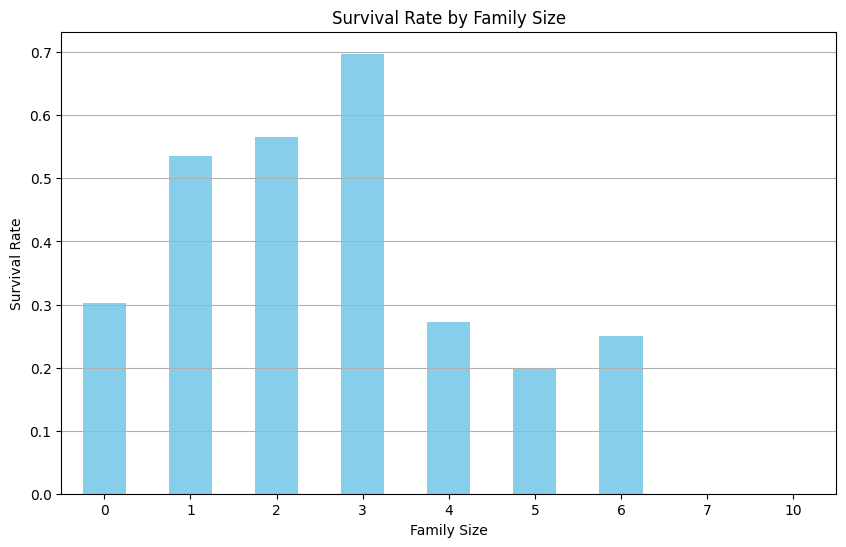

In [ ]:
import matplotlib.pyplot as plt

# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.

In [ ]:
df[['pclass','fare']].head()

,pclass,fare
0,1,211.3375
1,1,151.5500
2,1,151.5500
3,1,151.5500
4,1,151.5500


In [ ]:
# 객실 등급별 평균 요금 계산
mean_fare_by_pclass = df.groupby('pclass')['fare'].mean().to_dict()
print(mean_fare_by_pclass,'\n')

# 객실 등급별 평균 요금 파생 변수 생성
df['mean_fare_by_pclass'] = df['pclass'].map(mean_fare_by_pclass)

df[['pclass','fare','mean_fare_by_pclass']].head()

{1: 87.50899164086687, 2: 21.179196389891697, 3: 13.302888700564973} 



,pclass,fare,mean_fare_by_pclass
0,1,211.3375,87.508992
1,1,151.5500,87.508992
2,1,151.5500,87.508992
3,1,151.5500,87.508992
4,1,151.5500,87.508992


In [ ]:
# mean_fare_by_pclass 와 생존 여부 간의 상관계수 계산
mean_fare_survival_correlation = df[['mean_fare_by_pclass','survived']].corr().iloc()


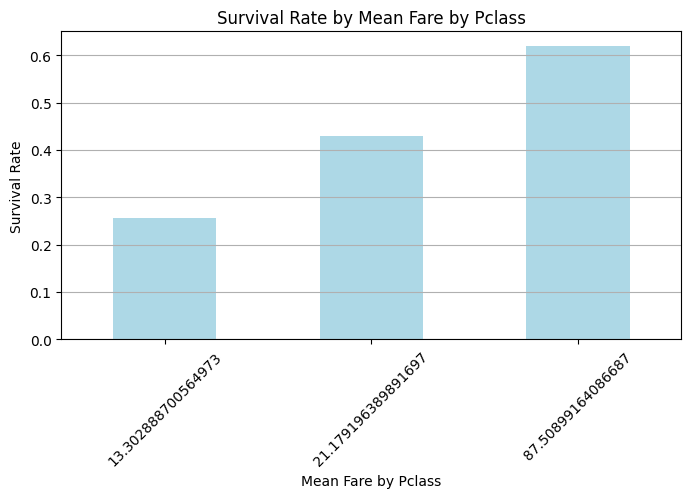

In [ ]:
# 생존율과 Mean Fare by Pclass 간의 막대그래프 그리기

# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(8, 4))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## 2024년 5월 31일

Task1_0531. auto-mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Google Colab에서 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

Saving auto-mpg.csv to auto-mpg.csv


In [ ]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [ ]:
# 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

# car name 열 제거
df = df.drop(columns = ['car name'])


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB
None


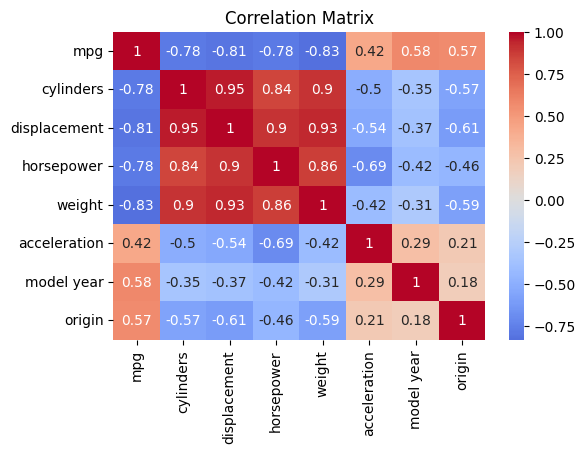

In [ ]:
# 탐색적 데이터 분석
# center = 0, 색상 맵의 중앙값이 0, 0보다 큰 값과 작은 값이 다른 색으로 표시
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 변수 선정 (상관계수 기반)
target_variable = 'mpg'
correlation_threshold = 0.5
correlated_features = df.corr()[target_variable][abs(df.corr()[target_variable]) > correlation_threshold].index.tolist()

# 파생 변수 생성 : 예를 들어, 증량 대비 마력비 (horsepower-to-weight ratio)
df['hp_to_weight'] = df['horsepower'] / df['weight']
df.head( )

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_to_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591


In [ ]:
# 분석용 데이터셋 구축
selected_features = correlated_features + ['hp_to_weight']
analysis_df = df[selected_features]

In [ ]:
# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns = [target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns = analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

   cylinders  displacement  horsepower    weight  model year    origin  \
0   1.483947      1.077290    0.664133  0.620540   -1.625315 -0.716641   
1   1.483947      1.488732    1.574594  0.843334   -1.625315 -0.716641   
2   1.483947      1.182542    1.184397  0.540382   -1.625315 -0.716641   
3   1.483947      1.048584    1.184397  0.536845   -1.625315 -0.716641   
4   1.483947      1.029447    0.924265  0.555706   -1.625315 -0.716641   

   hp_to_weight   mpg  
0      0.382496  18.0  
1      1.661177  15.0  
2      1.488456  18.0  
3      1.494892  16.0  
4      0.971505  17.0  


In [ ]:
# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10.139094603469605
Root Mean Squared Error: 3.1841944983731136
R-squared: 0.8013522973313041


----------------------------------------------------------------------------------------

In [ ]:
import pandas as pd

# 데이터 로드
file_path = 'auto-mpg.csv'
data = pd.read_csv(file_path, index_col=0)

# 'horsepower'를 숫자로 변환하며, 변환할 수 없는 값은 NaN으로 설정
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# 'car name' 열 삭제
data = data.drop(columns=['car name'])

# NaN 값을 가진 행 확인
print(data.isnull().sum())

# 'horsepower'의 NaN 값을 중앙값으로 대체
median_horsepower = data['horsepower'].median()
data['horsepower'].fillna(median_horsepower, inplace=True)

# 'origin'을 범주형 데이터로 변환
data['origin'] = data['origin'].astype('category')

# 인덱스를 리셋하여 'mpg'를 일반 열로 변환
data = data.reset_index()

# 데이터 프레임의 요약 정보 출력
print(data.info())

# 데이터 프레임의 첫 몇 행 출력
print(data.head())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# MPG 분포
plt.figure(figsize=(10, 6))
sns.histplot(data['mpg'], bins=30, kde=True)
plt.title('MPG 분포')
plt.xlabel('MPG')
plt.ylabel('빈도')
plt.show()

# 상관 관계 히트맵
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('상관 관계 히트맵')
plt.show()

# 주요 특성에 따른 MPG 산점도
plt.figure(figsize=(12, 8))
features = ['horsepower', 'weight', 'displacement', 'acceleration']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[feature], y=data['mpg'])
    plt.title(f'MPG vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('MPG')
plt.tight_layout()
plt.show()

# 실린더와 원산지에 따른 MPG 박스 플롯
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['cylinders'], y=data['mpg'])
plt.title('실린더별 MPG')
plt.xlabel('실린더')
plt.ylabel('MPG')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['origin'], y=data['mpg'])
plt.title('원산지별 MPG')
plt.xlabel('원산지')
plt.ylabel('MPG')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

X = data.drop(columns=['mpg'])
X = pd.get_dummies(X, drop_first=True)
y = data['mpg']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

## 2024년 6월 3일

Task1. 주어진 df의 날짜 리스트를 datetime 형식으로 변환하고, 변환된 데이터프레임의 년도, 월, 일 열을 추가하시오.

In [ ]:
import pandas as pd

# 날짜 문자열 리스트
date_list = ['2023-01-01', '2023-02-15', '2023-03-30']

# 데이터프레임 생성
df = pd.DataFrame(date_list, columns=['date'])

# 날짜를 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

# 년도, 월, 일 열 추가
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df

,date,year,month,day
0,2023-01-01,2023,1,1
1,2023-02-15,2023,2,15
2,2023-03-30,2023,3,30


Task2. 주어진 월간 데이터를 타임스탬프로 변환하고, 변환된 결과에서 시간을 제외한 날짜만 출력하시오.

In [ ]:
import pandas as pd

# 문자열을 Period로 변환
period_data = pd.Series(['2023-01', '2023-02', '2023-03'], name='period')

# Period를 Timestamp로 변환
timestamp_data = pd.to_datetime(period_data, format='%Y-%m')

# Timestamp에서 시간 제외하고 날짜만 출력
date_data = timestamp_data.dt.date

print(date_data)

0    2023-01-01
1    2023-02-01
2    2023-03-01
Name: period, dtype: object


In [ ]:
import pandas as pd

# 문자열을 Period로 변환
period_data = period_data.astype('period[M]')

# Period를 Timestamp로 변환
timestamp_data = period_data.apply(lambda x: x.to_timestamp())

print(timestamp_data)

0   2023-01-01
1   2023-02-01
2   2023-03-01
Name: period, dtype: datetime64[ns]


Task3. 주어진 날짜 데이터 시리즈를 분기로 변환하고, 각 분기별로 데이터의 개수를 출력하세요.

In [ ]:
import pandas as pd

# 날짜 데이터 시리즈
date_series = pd.Series(pd.date_range('2023-01-01', '2023-12-31', freq='M'))
date_series

0    2023-01-31
1    2023-02-28
2    2023-03-31
3    2023-04-30
4    2023-05-31
5    2023-06-30
6    2023-07-31
7    2023-08-31
8    2023-09-30
9    2023-10-31
10   2023-11-30
11   2023-12-31
dtype: datetime64[ns]

In [ ]:
# 날짜 데이터를 분기로 변환
quarter_data = date_series.dt.to_period('Q')

# 각 분기별 데이터 개수 세기
quarter_counts = quarter_data.value_counts().sort_index()

print(quarter_counts)

2023Q1    3
2023Q2    3
2023Q3    3
2023Q4    3
Freq: Q-DEC, Name: count, dtype: int64


Task4. 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성하고, 이 날짜 범위에서 매월 첫 번째 날만 포함하는 데이터프레임을 작성하세요

In [3]:
import pandas as pd

date_range = pd.date_range('2023-01-01', '2023-12-31')
first_days_of_month = date_range[date_range.day == 1]
df = pd.DataFrame({'Date': first_days_of_month})

print(df)

         Date
0  2023-01-01
1  2023-02-01
2  2023-03-01
3  2023-04-01
4  2023-05-01
5  2023-06-01
6  2023-07-01
7  2023-08-01
8  2023-09-01
9  2023-10-01
10 2023-11-01
11 2023-12-01


In [10]:
import pandas as pd

# 날짜 범위 생성(2023년 1월 1일부터 12월 31일까지)
date_range = pd.date_range(start ='2023-01-01', end='2023-12-31', freq='MS')

# 데이터프레임 생성
df = pd.DataFrame(date_range, columns =['first_day_of_month'])

print(df)

   first_day_of_month
0          2023-01-01
1          2023-02-01
2          2023-03-01
3          2023-04-01
4          2023-05-01
5          2023-06-01
6          2023-07-01
7          2023-08-01
8          2023-09-01
9          2023-10-01
10         2023-11-01
11         2023-12-01


Task5. 2020년부터 2025년까지의 분기별 기간 범위를 생성하고, 각 분기의 시작과 끝 날짜를 포함하는 데이터프레임을 작성하세요.

In [12]:
import pandas as pd

# 분기별 기간 범위 생성(2020년부터 2025년까지)
period_range = pd.period_range(start='2020Q1', end='2025Q4', freq = 'Q')

# 데이터프레임 생성
df = pd.DataFrame({
    'quarter' : period_range,
    'start_date' : period_range.start_time.date,
    'end_date' : period_range.end_time.date
})

print(df)

   quarter  start_date    end_date
0   2020Q1  2020-01-01  2020-03-31
1   2020Q2  2020-04-01  2020-06-30
2   2020Q3  2020-07-01  2020-09-30
3   2020Q4  2020-10-01  2020-12-31
4   2021Q1  2021-01-01  2021-03-31
5   2021Q2  2021-04-01  2021-06-30
6   2021Q3  2021-07-01  2021-09-30
7   2021Q4  2021-10-01  2021-12-31
8   2022Q1  2022-01-01  2022-03-31
9   2022Q2  2022-04-01  2022-06-30
10  2022Q3  2022-07-01  2022-09-30
11  2022Q4  2022-10-01  2022-12-31
12  2023Q1  2023-01-01  2023-03-31
13  2023Q2  2023-04-01  2023-06-30
14  2023Q3  2023-07-01  2023-09-30
15  2023Q4  2023-10-01  2023-12-31
16  2024Q1  2024-01-01  2024-03-31
17  2024Q2  2024-04-01  2024-06-30
18  2024Q3  2024-07-01  2024-09-30
19  2024Q4  2024-10-01  2024-12-31
20  2025Q1  2025-01-01  2025-03-31
21  2025Q2  2025-04-01  2025-06-30
22  2025Q3  2025-07-01  2025-09-30
23  2025Q4  2025-10-01  2025-12-31


Task6. 0일부터 10일까지의 시간 범위를 12시간 간격으로 생성하고, 각 간격에 대해 누적 시간을 계산하여 데이터프레임을 작성하세요.

In [19]:
import pandas as pd

# 시간 범위 생성 (0일부터 10일까지 12시간 간격)
timedelta_range = pd.timedelta_range(start = 0, end='100',freq='12H')

# 데이터프레임 생성
df = pd.DataFrame({
    'timedelta' : timedelta_range,
    'cumulative_time' : [timedelta.total_seconds() / 3600 for timedelta in timedelta_range] # 누적 시간을 시간 단위로 계산
 })

print(df)

  timedelta  cumulative_time
0    0 days              0.0


Task7. 주어진 df 에서 특정 날짜 이후의 데이터를 필터링하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'value': [1, 2, 3, 4, 5]
})
df['date'] = pd.to_datetime(df['date'])
df

In [7]:
df['date'] = pd.to_datetime(df['date'])

# 특정 날짜 이후의 데이터를 필터링
df[df['date'] >= '2022-01-03']

# 필터링된 데이터프레임 출력
print(df)

        date  value
0 2022-01-01      1
1 2022-01-02      2
2 2022-01-03      3
3 2022-01-04      4
4 2022-01-05      5


Task8. 주어진 df에서 월별로 데이터의 합계를 계산하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-15', '2022-02-01', '2022-02-15', '2022-03-01'],
    'value': [1, 2, 3, 4, 5]
})
df['date'] = pd.to_datetime(df['date'])
df

In [22]:
# 월별 데이터 집계
df['month'] = df['date'].dt.to_period('M')
monthly_sum = df.groupby('month')['value'].sum().reset_index()
print(monthly_sum)

     month  value
0  2022-01      3
1  2022-02      7
2  2022-03      5


Task9. 주어진 데이터프레임에서 주말(토요일과 일요일) 데이터를 필터링하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-08', '2022-01-09'],
    'value': [1, 2, 3, 4, 5]
})
df['date'] = pd.to_datetime(df['date'])
df

In [24]:
# 주말 데이터 필터링
df['day_of_week'] = df['date'].dt.dayofweek
weekend_df = df[df['day_of_week'] >= 5]
print(weekend_df)

        date  value  day_of_week
0 2022-01-01      1            5
1 2022-01-02      2            6
3 2022-01-08      4            5
4 2022-01-09      5            6


Task10. 주어진 df에서 분기별 데이터의 평균을 계산하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01'],
    'value': [1, 2, 3, 4, 5]
})
df['date'] = pd.to_datetime(df['date'])

df

In [27]:
# 분기별 데이터 평균 계산
df['quarter'] = df['date'].dt.to_period('Q')
quarterly_mean = df.groupby('quarter')['value'].mean().reset_index()
print(quarterly_mean)

  quarter  value
0  2022Q1    2.0
1  2022Q2    4.5


Task11. 주어진 df에서 작업 일자(월요일부터 금요일)만 남기고 필터링하세요.

In [ ]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-08', '2022-01-09'],
    'value': [1, 2, 3, 4, 5, 6]
})
df['date'] = pd.to_datetime(df['date'])
df

In [30]:
# 작업 일지(월요일부터 금요일) 필터링
df['day_of_week'] = df['date'].dt.dayofweek
workdays_df = df[df['day_of_week'] < 5]
print(workdays_df)

        date  value  day_of_week
1 2022-01-03      2            0
2 2022-01-04      3            1
3 2022-01-05      4            2
